In [58]:
import numpy as np
import pandas as pd
from numpy import arange 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [3]:
#reading the data

df = pd.read_csv(r'C:\Users\francis\Downloads\graduate-admissions\Admission_Predict.csv')

In [5]:
df.head(50)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [6]:
print(df.shape)

(400, 9)


In [7]:
print(df.dtypes)

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object


In [8]:
# descriptions and to know scale range of each features
set_option('precision', 1) 
print(df.describe())


       Serial No.  GRE Score  TOEFL Score  University Rating    SOP   LOR   \
count       400.0      400.0        400.0              400.0  400.0  400.0   
mean        200.5      316.8        107.4                3.1    3.4    3.5   
std         115.6       11.5          6.1                1.1    1.0    0.9   
min           1.0      290.0         92.0                1.0    1.0    1.0   
25%         100.8      308.0        103.0                2.0    2.5    3.0   
50%         200.5      317.0        107.0                3.0    3.5    3.5   
75%         300.2      325.0        112.0                4.0    4.0    4.0   
max         400.0      340.0        120.0                5.0    5.0    5.0   

        CGPA  Research  Chance of Admit   
count  400.0     400.0             400.0  
mean     8.6       0.5               0.7  
std      0.6       0.5               0.1  
min      6.8       0.0               0.3  
25%      8.2       0.0               0.6  
50%      8.6       1.0               0.

In [63]:
df =  df.drop(['Serial No.','SOP','Research'], axis=1)

KeyError: "labels ['Serial No.' 'SOP' 'Research'] not contained in axis"

In [65]:
#separate input and output components

X = df.iloc[:,0:5]

Y = df.iloc[:,5]

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Chance of Admit      400 non-null float64
dtypes: float64(3), int64(3)
memory usage: 18.8 KB


In [66]:
X

,GRE Score,TOEFL Score,University Rating,LOR,CGPA
0,337,118,4,4.5,9.7
1,324,107,4,4.5,8.9
2,316,104,3,3.5,8.0
3,322,110,3,2.5,8.7
4,314,103,2,3.0,8.2
5,330,115,5,3.0,9.3
6,321,109,3,4.0,8.2
7,308,101,2,4.0,7.9
8,302,102,1,1.5,8.0
9,323,108,3,3.0,8.6


In [67]:
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

In [15]:
print(rescaledX)

[[-1.72772608  1.76210664  1.74697064 ...  1.16732114  1.76481828
   0.90911166]
 [-1.7190658   0.62765641 -0.06763531 ...  1.16732114  0.45515126
   0.90911166]
 [-1.71040552 -0.07046681 -0.56252785 ...  0.05293342 -1.00563118
   0.90911166]
 ...
 [ 1.71040552  1.15124883  1.41704229 ...  1.16732114  1.42900622
   0.90911166]
 [ 1.7190658  -0.41952842 -0.72749202 ...  0.61012728  0.30403584
  -1.09997489]
 [ 1.72772608  1.41304503  1.58200646 ...  0.61012728  1.78160888
   0.90911166]]


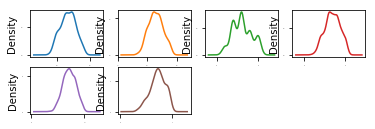

In [68]:
# density 
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False, 
             fontsize=1)
pyplot.show()


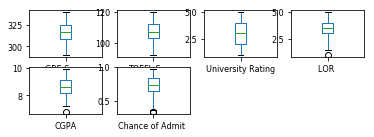

In [69]:
# box and whisker plots
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, 
             fontsize=8) 
pyplot.show()


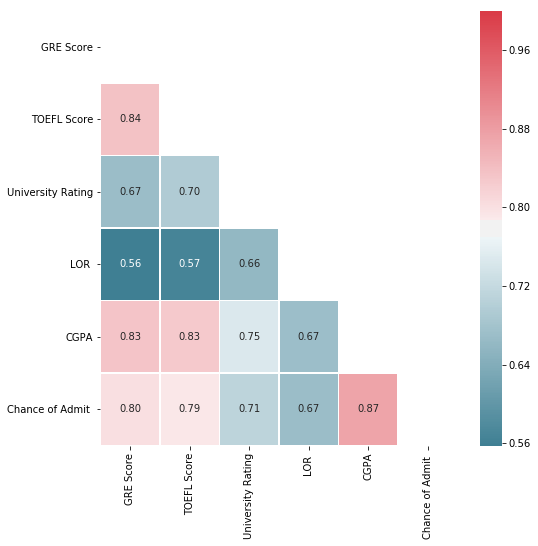

In [70]:
# correlation matrix
import numpy as np
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()


In [31]:
from sklearn.decomposition import PCA

In [34]:
# feature extraction 
pca = PCA(n_components=5)
fit = pca.fit(X)

In [35]:
# summarize components 
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)


Explained Variance: [9.87439126e-01 1.17406789e-02 6.76335277e-04 8.43005752e-05
 2.57460785e-05]
[[-9.99918431e-01  9.80922018e-03  7.82981162e-03  1.69039775e-03
   1.46125124e-03  6.91671916e-04  2.41260648e-04  2.75468455e-04]
 [-1.23733578e-02 -8.99574561e-01 -4.24751333e-01 -6.19534984e-02
  -5.02600652e-02 -4.08852574e-02 -4.05636912e-02 -2.27483415e-02]
 [ 2.99606567e-03 -4.33895133e-01  8.94081687e-01  6.89673695e-02
   6.90802877e-02  4.17671088e-02  3.14430316e-02 -9.06835151e-03]
 [ 7.84839530e-04 -3.93820309e-02 -1.37769130e-01  5.88533384e-01
   5.73080704e-01  5.31208327e-01  1.36365325e-01  6.24282022e-02]
 [ 3.34781941e-04 -4.83370588e-03 -1.37600081e-02  7.87714075e-01
  -3.20524992e-01 -5.25040463e-01 -9.75125355e-03 -2.81935333e-02]]


In [71]:
validation_size = 0.20 
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [72]:
# Test options and evaluation metric 
num_folds = 10
seed = 7 
scoring = 'neg_mean_squared_error'

In [73]:
# Spot-Check Algorithms 
models = []
models.append(('LR', LinearRegression())) 
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet())) 
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor())) 
models.append(('SVR', SVR()))

In [74]:
# evaluate each model in turn 
results = [] 
names = [] 
for name, model in models: 
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring) 
    results.append(cv_results) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.004119 (0.001467)
LASSO: -0.014778 (0.004414)
EN: -0.009013 (0.002858)
KNN: -0.006115 (0.001752)
CART: -0.008963 (0.002599)
SVR: -0.009704 (0.002399)


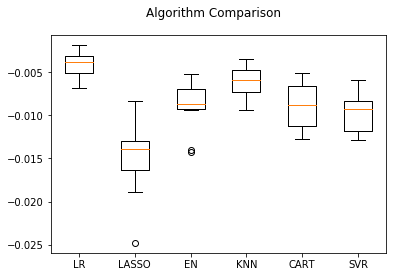

In [75]:
# Compare Algorithms 
fig = pyplot.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names) 
pyplot.show()

In [76]:
# Standardize the dataset 
pipelines = [] 
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())]))) 
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())]))) 
results = [] 
names = [] 
for name, model in pipelines: 
    kfold = KFold(n_splits=num_folds, random_state=seed) 
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring) 
    results.append(cv_results) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg)

ScaledLR: -0.004119 (0.001467)
ScaledLASSO: -0.020195 (0.005184)
ScaledEN: -0.020195 (0.005184)
ScaledKNN: -0.004675 (0.001591)
ScaledCART: -0.008586 (0.002508)
ScaledSVR: -0.006136 (0.001750)


In [77]:
# prepare the model 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400) 
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=7,
             subsample=1.0, verbose=0, warm_start=False)

In [78]:
# transform the validation dataset 
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX) 
print(mean_squared_error(Y_validation, predictions))


0.007007740075259727


In [52]:
Y_validation

265    0.7
65     0.6
120    0.9
132    0.7
378    0.6
26     0.8
287    0.9
111    0.7
280    0.7
164    0.8
56     0.6
274    0.6
155    0.8
346    0.5
220    0.8
393    0.8
118    0.5
57     0.5
327    0.7
301    0.7
52     0.8
138    0.8
397    0.9
391    0.7
30     0.7
295    0.7
253    0.9
194    0.8
231    0.7
154    0.8
      ... 
3      0.8
22     0.9
159    0.5
372    0.9
210    0.8
216    0.9
268    0.8
114    0.6
398    0.7
80     0.5
148    1.0
361    0.9
368    0.5
331    0.7
90     0.6
330    0.8
333    0.7
238    0.7
332    0.8
292    0.6
385    1.0
145    0.8
170    0.7
232    0.7
374    0.4
221    0.8
59     0.4
362    0.9
74     0.7
79     0.5
Name: Chance of Admit , Length: 80, dtype: float64

In [80]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [82]:
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [83]:
lm.intercept_


-1.4388715331737445

In [84]:
lm.coef_


array([0.00257456, 0.00213064, 0.00576682, 0.02275319, 0.11896314])

In [87]:
lm.score(X_validation, Y_validation)


0.7834949712906797